# Coding Exercise Thirteen: Interface
This week, you'll be revisiting a database (such as our example, gathered from Tweepy) and exploring methods for visualizing the data to others. Your exercise should:

- Import or collect your data as appropriate, using OS or an API
- Make and structure your data in a Pandas dataframe
- Use NLTK to tokenize the data, and chart a word cloud
- Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API
- Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed

Consider exploring other visualization types in the Bokeh API documentation, and play with the color options and scale of your visualization.

(Karsdorp, Kestemont, and Riddell).


## Stage One: Import or collect your data as appropriate, using OS or an API

(Karsdorp, Kestemont, and Riddell).

In [ ]:
#documented at: https://towardsdatascience.com/web-scraping-metacritic-reviews-using-beautifulsoup-63801bbe200e
#we're going back to week six to import reviews, but this time we're getting all of them!

import requests
from bs4 import BeautifulSoup
import pandas as pd

## Stage Two: Make and structure your data in a Pandas dataframe

(Karsdorp, Kestemont, and Riddell).

In [100]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for i in range(0,39):
    url = 'https://www.metacritic.com/game/playstation-3/the-walking-dead-a-telltale-games-series/user-reviews?page=' + str(i)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'): 
        if review.find('div', class_='name') == None:
            break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'): 
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
           # print(review.find('span', class_='blurb blurb_expanded').text)
        elif review.find('div',class_='review_body').find('span') == None:
            review_dict['review'].append('No review text.')
           # print("No review")
        else:
            review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
          #  print(review.find('div',class_='review_body').find('span').text)

In [101]:
ac_reviews = pd.DataFrame(review_dict)
print(ac_reviews)

                name          date rating  \
0           chujfugh  Dec 12, 2012     10   
1      the_blueprint  Dec 11, 2013      8   
2    SayHeyToPhillip  Jun 27, 2014      9   
3     TheOnlineGamer  Jan 13, 2014     10   
4          HSPLazerz  May  8, 2015     10   
..               ...           ...    ...   
111           Folmer  Feb 23, 2019     10   
112           Xalted  Oct 22, 2019     10   
113          INU4SH4  Jul  3, 2020      9   
114     EndlessAbyss  Sep 27, 2020     10   
115     kappawappa23  Apr  5, 2021     10   

                                                review  
0    For 30 years, games have been held back by the...  
1    I like the game because the story and characte...  
2    The Walking Dead gathers everything from enter...  
3    Captures the essence of The Walking Dead Comic...  
4    By far, the best game I have ever, and will ev...  
..                                                 ...  
111  This game has a really great story, and it is ...  
112

## Stage Three: Use NLTK to tokenize the data, and chart a word cloud

(Karsdorp, Kestemont, and Riddell).

In [102]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [103]:
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_reviews(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [104]:
cleaned_reviews = []
for i in range(0,len(ac_reviews['review'])):
    cleaned_reviews.append(cleaning_reviews((ac_reviews.review[i])))
print(cleaned_reviews[0:5])

['for years games have been held back the idea that fun defining factor sure love fun and one the most powerful ways engross player but imagine all films fit under the category fun wouldn have films like schindler list hurt locker apocalypse now and the godfather our medium has never had our own citizen kane own godfather until now spec ops the line was the apocalypse now gaming and skyrim the lord the rings the walking dead the dead alive and even that isn doing justice dead alive the best zombie film ever look past the glitches and have near perfect game the puzzles are tricky and take fair bit though the art style the best use cell shading seen the characters are well written and have arcs its atmosphere very tense and you have the urge play the very end once you picked the episodes themselves were quite short hours best but the retail release actually makes seem like one coherent game instead playing parts game months apart actions have consequences the littlest choice has the huge

In [116]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["walking","dead","telltale","kill"])

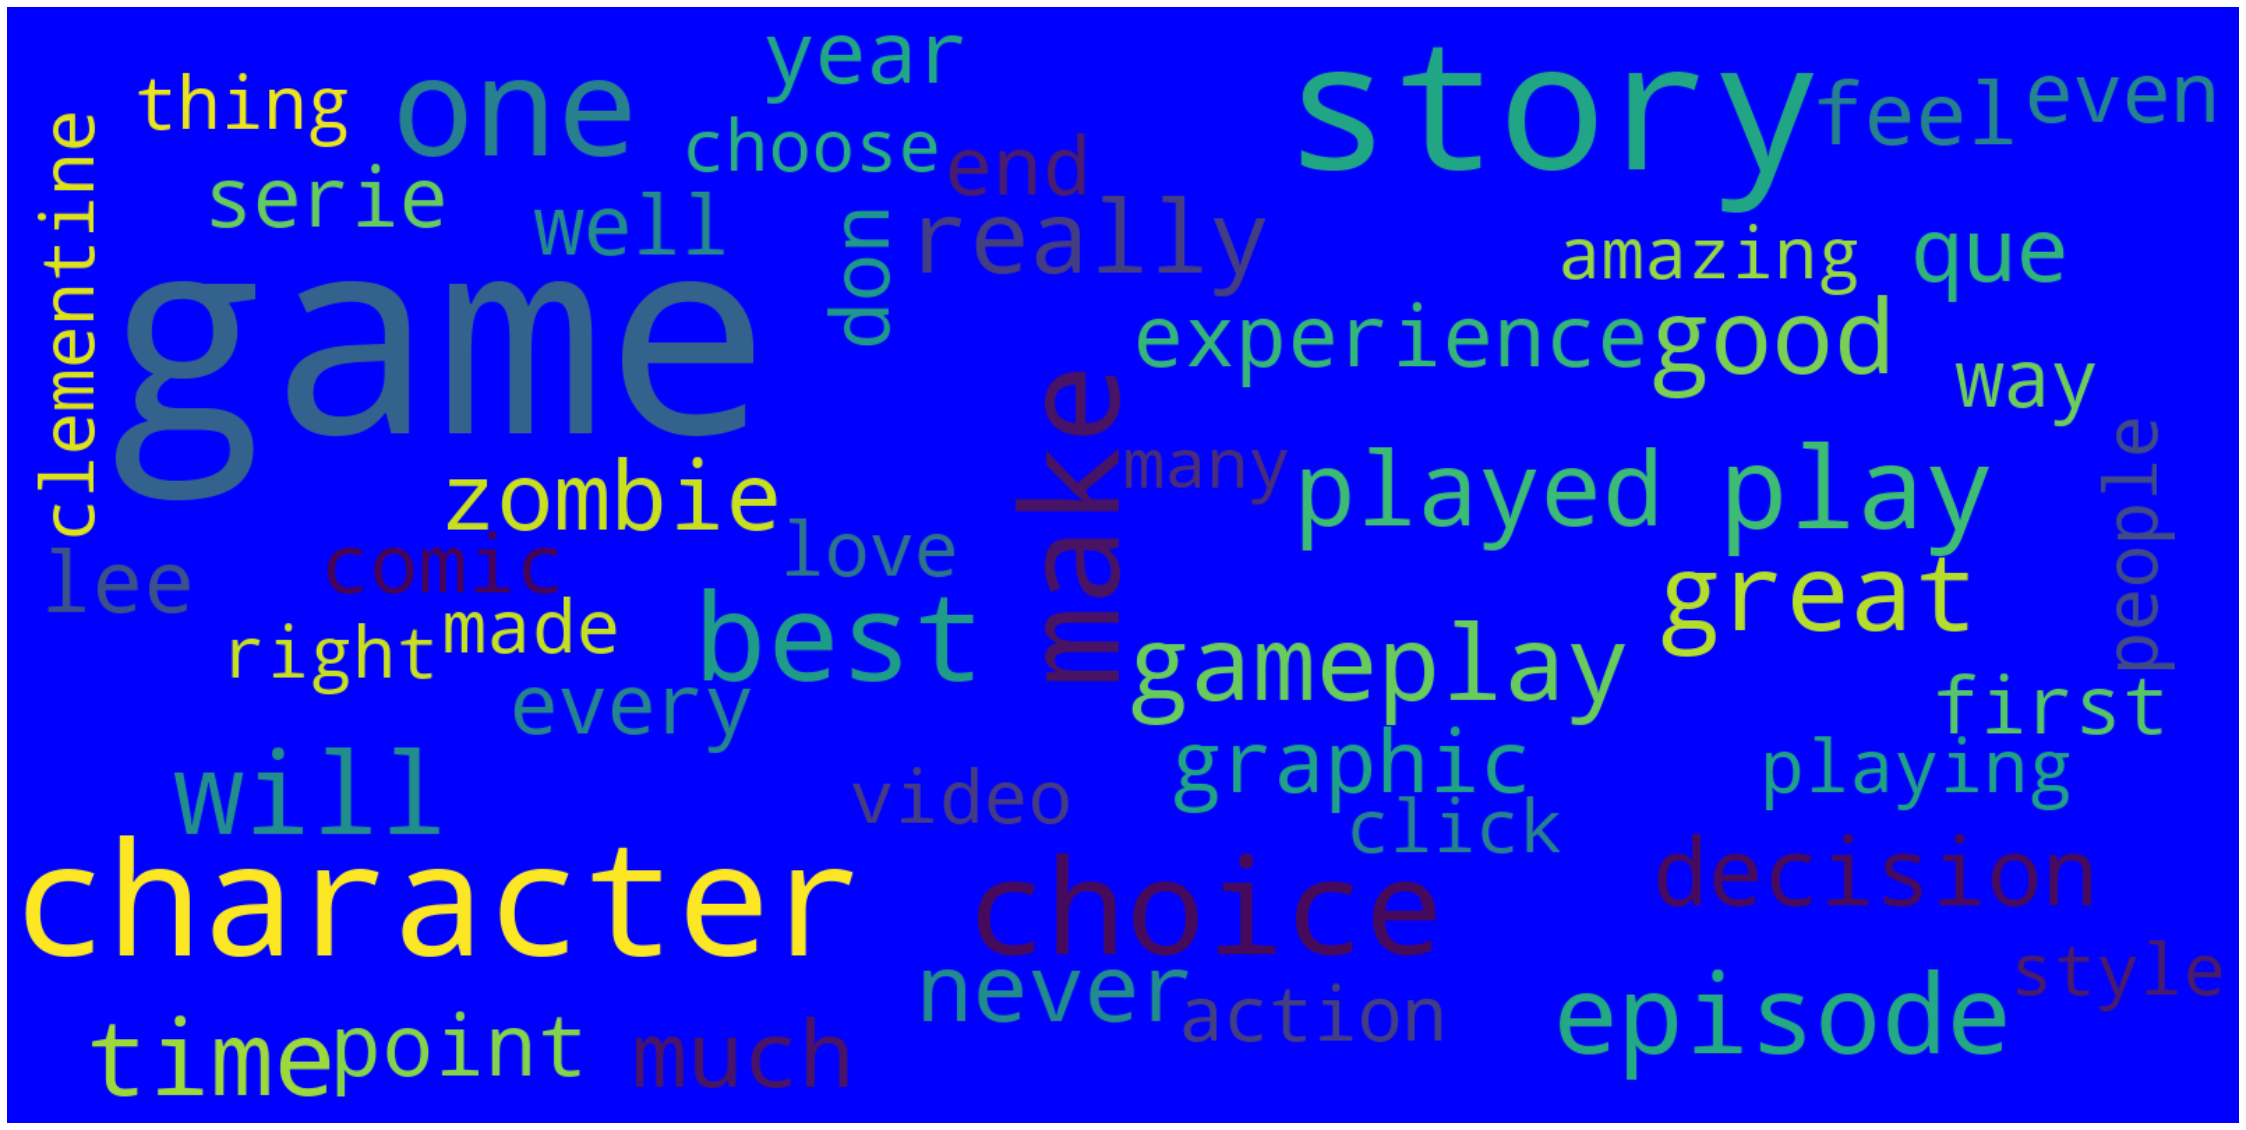

In [118]:
string = pd.Series(cleaned_reviews).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='blue').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Stage Four: Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API

(Karsdorp, Kestemont, and Riddell).

In [119]:
import numpy as np
from PIL import Image
import random

mask = np.array(Image.open('./nook.jpg'))

FileNotFoundError: [Errno 2] No such file or directory: './nook.jpg'

In [115]:
wordcloud = WordCloud(width=2000, mask = mask,stopwords=stopwords,height=1000,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(20,10))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(150, 50%%, %d%%)" % random.randint(60, 100)
plt.axis("off")

plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")
plt.title('The Walking Dead', size='100')
plt.axis("off")
plt.show()

NameError: name 'mask' is not defined

## Stage Five: Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed

(Karsdorp, Kestemont, and Riddell).

In [109]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [120]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [111]:
ac_reviews['Sentiment Score'] = ac_reviews['review'].apply(calculate_sentiment)
ac_reviews.sort_values(by='Sentiment Score', ascending=False)[:15]

,name,date,rating,review,Sentiment Score
71,MooreReviews,"Jun 18, 2013",9,I took shot In the dark with this game. The on...,0.9967
72,Jellybean15,"Aug 6, 2013",9,"When I first received this game in the mail, I...",0.9942
87,dj_cole,"Nov 17, 2014",8,The best way to describe the Walking Dead Seas...,0.9934
19,TheQuietGamer,"Dec 28, 2012",9,Just a heads up I have played all 5 episodes o...,0.9916
62,dirtyjeff,"Apr 1, 2013",7,I'm not a fan of the Walking Dead TV series bu...,0.9888
0,chujfugh,"Dec 12, 2012",10,"For 30 years, games have been held back by the...",0.9883
74,mijxero,"Aug 2, 2014",10,I don't normally give out 10s but this game de...,0.9848
51,Toffenuff,"Jul 2, 2014",9,"I'm a big fan of open-world, make-your-own sto...",0.9835
76,SJ-ULTI-Reiews,"Sep 29, 2013",10,"This game was my Game of the Year for 2012, an...",0.9823
3,TheOnlineGamer,"Jan 13, 2014",10,Captures the essence of The Walking Dead Comic...,0.9819


In [122]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Viridis256
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.models.tools import WheelZoomTool
from bokeh.transform import jitter

#file for output
output_file(filename="ac.html", title="AC Reviews Visualization")

In [123]:
ac_reviews['rating'] = ac_reviews['rating'].astype(int)
source = ColumnDataSource(ac_reviews)
mapper = linear_cmap(field_name='Sentiment Score', palette=Viridis256 ,low=-1 ,high=1)
p = figure(plot_height=1000, plot_width=1000, toolbar_location="below")
p.circle(x=jitter('rating',width=1,range=p.x_range), y='Sentiment Score', source=source, size=5, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.title.text = 'Animal Crossing Reviews'
p.xaxis.axis_label = 'Review Score'
p.yaxis.axis_label = 'Sentiment Score'

In [124]:
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Review: </b>
@review
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...